In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


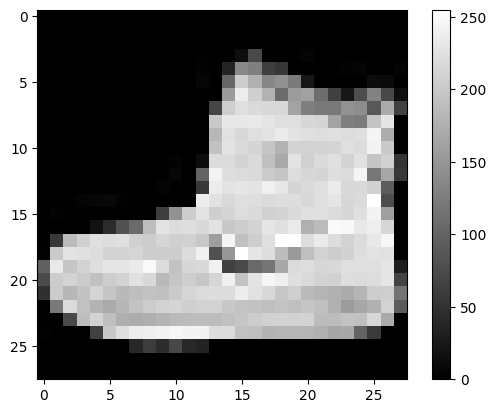

In [5]:
# Візуалізація першого зображення з тренувального датасету
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Бачимо чобіток

In [6]:
# Нормалізація значень пікселів до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# Зміна форми зображень для відповідності вхідному формату Conv2D
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [8]:
# Розділення тренувального набору на тренувальний та валідаційний
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [9]:
# Перетворення міток у формат one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [10]:
# Перевірка форм даних після перетворення
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


## Модель 1. Класика, 10 епох, Adam.

In [11]:
model_con1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [12]:
model_con1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [13]:
# Компіляція моделі
model_con1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history_1= model_con1.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.4724 - accuracy: 0.8268 - val_loss: 0.3478 - val_accuracy: 0.8696
Epoch 2/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2981 - accuracy: 0.8911 - val_loss: 0.3095 - val_accuracy: 0.8852
Epoch 3/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2531 - accuracy: 0.9077 - val_loss: 0.2701 - val_accuracy: 0.9008
Epoch 4/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2210 - accuracy: 0.9187 - val_loss: 0.2653 - val_accuracy: 0.9039
Epoch 5/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1944 - accuracy: 0.9275 - val_loss: 0.2552 - val_accuracy: 0.9090
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1714 - accuracy: 0.9358 - val_loss: 0.2517 - val_accuracy: 0.9135
Epoch 7/10
1500/1500 [==============================] - 58s 38ms/step - loss: 0.1500 - accuracy: 0.9439 - val_loss: 0.2471 -

In [15]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_con1.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - loss: 0.2819 - accuracy: 0.9111 - 3s/epoch - 9ms/step


In [16]:
def plot_history(history_object):
  # Побудова графіку точності
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history_object.history['accuracy'], label='Точність на тренуванні')
  plt.plot(history_object.history['val_accuracy'], label='Точність на валідації')
  plt.xlabel('Епоха')
  plt.ylabel('Точність')
  plt.title('Точність тренування та валідації')
  plt.legend()

  # Додавання тестової точності до графіку
  plt.scatter(len(history_object.history['accuracy']), test_acc, label='Точність на тесті', color='red')
  plt.legend()

  # Побудова графіку втрат
  plt.subplot(1, 2, 2)
  plt.plot(history_object.history['loss'], label='Втрати на тренуванні')
  plt.plot(history_object.history['val_loss'], label='Втрати на валідації')
  plt.xlabel('Епоха')
  plt.ylabel('Втрати')
  plt.title('Втрати тренування та валідації')
  plt.legend()

# приклад використання
# plot_history(history_1)

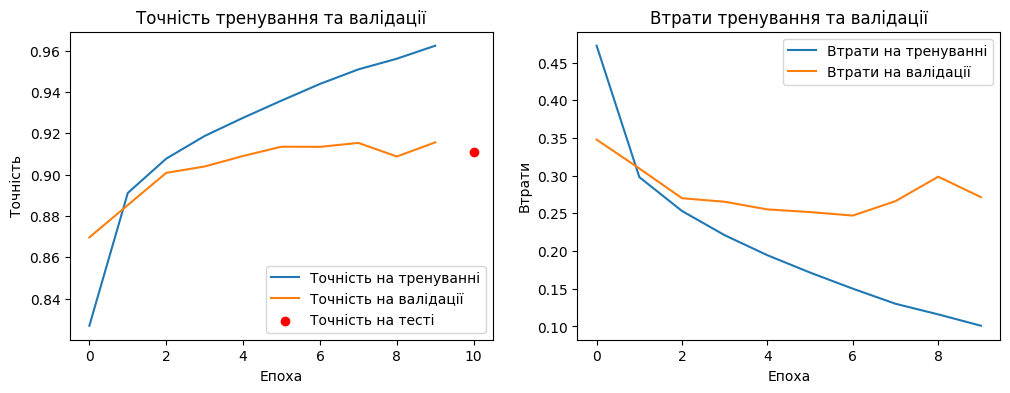

In [17]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Точність на тренуванні')
plt.plot(history_1.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_1.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Втрати на тренуванні')
plt.plot(history_1.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [18]:
print(history_1.history)

{'loss': [0.4724205732345581, 0.2980593740940094, 0.2531067430973053, 0.2209501564502716, 0.19442115724086761, 0.171401247382164, 0.15003852546215057, 0.13000577688217163, 0.11593049019575119, 0.10089345276355743], 'accuracy': [0.8268333077430725, 0.8911041617393494, 0.9077083468437195, 0.9186875224113464, 0.9274791479110718, 0.9358124732971191, 0.9438750147819519, 0.9509166479110718, 0.956083357334137, 0.9623749852180481], 'val_loss': [0.3478032946586609, 0.30950799584388733, 0.2700948119163513, 0.2653472423553467, 0.2552427649497986, 0.251674622297287, 0.2470710724592209, 0.26620057225227356, 0.2986283004283905, 0.27150958776474], 'val_accuracy': [0.8695833086967468, 0.8852499723434448, 0.9008333086967468, 0.9039166569709778, 0.9089999794960022, 0.9135000109672546, 0.9134166836738586, 0.9153333306312561, 0.9087499976158142, 0.9155833125114441]}


Модель може бути перенавчена, оскільки тренувальні метрики покращуються значно сильніше, ніж валідаційні.

   Epoch  Train Loss  Train Accuracy  Val Loss  Val Accuracy
0      1    0.454302        0.834813  0.348460      0.876833
1      2    0.288805        0.894125  0.292363      0.891167
2      3    0.245638        0.909958  0.255095      0.910000
3      4    0.214470        0.921729  0.240794      0.911917
4      5    0.191215        0.930125  0.230211      0.914583
5      6    0.165839        0.937771  0.237125      0.913333
6      7    0.144719        0.945917  0.233877      0.918667
7      8    0.123980        0.952750  0.261993      0.909583
8      9    0.107978        0.959000  0.257378      0.912333
9     10    0.091313        0.965750  0.302176      0.913917


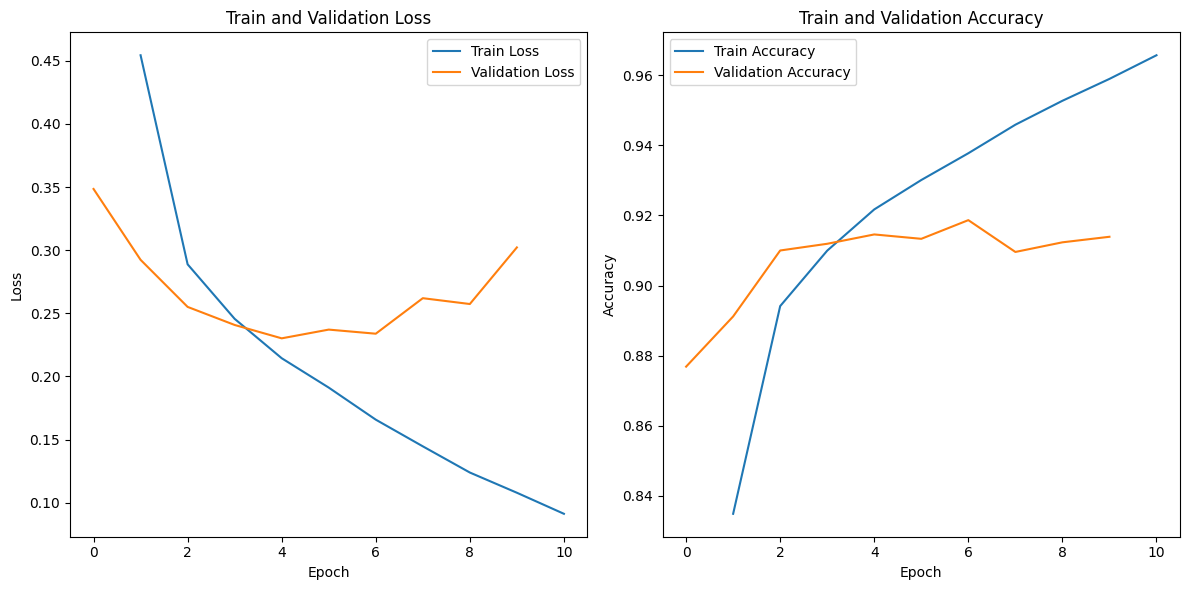

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Дані
data = {
    'Epoch': list(range(1, 11)),
    'Train Loss': [0.4543016254901886, 0.28880515694618225, 0.24563848972320557, 0.2144700139760971, 0.19121451675891876, 0.16583852469921112, 0.1447189599275589, 0.12397988140583038, 0.10797836631536484, 0.09131280332803726],
    'Train Accuracy': [0.8348125219345093, 0.8941249847412109, 0.9099583625793457, 0.9217291474342346, 0.9301249980926514, 0.9377708435058594, 0.9459166526794434, 0.952750027179718, 0.9589999914169312, 0.965749979019165],
    'Val Loss': [0.3484596312046051, 0.2923625707626343, 0.2550946772098541, 0.24079449474811554, 0.2302110195159912, 0.2371254414319992, 0.233877032995224, 0.26199325919151306, 0.25737816095352173, 0.3021757900714874],
    'Val Accuracy': [0.8768333196640015, 0.8911666870117188, 0.9100000262260437, 0.9119166731834412, 0.9145833253860474, 0.9133333563804626, 0.918666660785675, 0.909583330154419, 0.9123333096504211, 0.9139166474342346]
}

# Створення DataFrame
df = pd.DataFrame(data)

# Відображення таблиці
print(df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
plt.plot(df['Val Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
plt.plot(df['Val Accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history_model1 і history_model2 - це об'єкти History, отримані з model.fit()

def history_to_dataframe(history):
    """
    Перетворює об'єкт History у DataFrame.
    """
    return pd.DataFrame(history.history)

def compare_histories(history1, history2):
    """
    Порівнює два об'єкти History і виводить результати у вигляді таблиці.
    """
    df1 = history_to_dataframe(history1)
    df2 = history_to_dataframe(history2)

    # Додаємо суфікси для ідентифікації моделей у таблиці
    df1.columns = [col + '_model1' for col in df1.columns]
    df2.columns = [col + '_model2' for col in df2.columns]

    # Об'єднуємо дані у єдиний DataFrame
    comparison_df = pd.concat([df1, df2], axis=1)

    return comparison_df

def plot_comparison(comparison_df):
    """
    Будує графіки для порівняння двох моделей.
    """
    epochs = range(1, len(comparison_df) + 1)

    # Графік втрат
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, comparison_df['loss_model1'], 'b-', label='Train Loss Model 1')
    plt.plot(epochs, comparison_df['val_loss_model1'], 'b--', label='Val Loss Model 1')
    plt.plot(epochs, comparison_df['loss_model2'], 'r-', label='Train Loss Model 2')
    plt.plot(epochs, comparison_df['val_loss_model2'], 'r--', label='Val Loss Model 2')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Графік точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, comparison_df['accuracy_model1'], 'b-', label='Train Accuracy Model 1')
    plt.plot(epochs, comparison_df['val_accuracy_model1'], 'b--', label='Val Accuracy Model 1')
    plt.plot(epochs, comparison_df['accuracy_model2'], 'r-', label='Train Accuracy Model 2')
    plt.plot(epochs, comparison_df['val_accuracy_model2'], 'r--', label='Val Accuracy Model 2')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# # Приклад використання
# # Припустимо, що у вас є об'єкти History після тренування моделей:
# # history_model1 = model1.fit(...)
# # history_model2 = model2.fit(...)

# # Перетворення історії тренування у DataFrame
# comparison_df = compare_histories(history_model1, history_model2)

# # Виведення таблиці
# print(comparison_df)

# # Побудова графіків для порівняння
# plot_comparison(comparison_df)


In [21]:
import numpy as np
from sklearn.metrics import classification_report

# Отримання передбачень для тестових даних
predictions = model_con1.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.88      0.86      1000
           3       0.93      0.88      0.90      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.78      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [22]:
model_con1.save("fashion_mnist_model_con1.keras")

**Висновок 1.** Модель model_con1. дала високу точність на тренувальних даних але маємо певне перенавчання.

## Модель 2. Використання RMSprop.

In [23]:
model_con2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [24]:
# Компіляція моделі
model_con2.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_con2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [26]:
history_2= model_con2.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.4663 - accuracy: 0.8282 - val_loss: 0.3258 - val_accuracy: 0.8798
Epoch 2/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2909 - accuracy: 0.8931 - val_loss: 0.3007 - val_accuracy: 0.8902
Epoch 3/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2452 - accuracy: 0.9107 - val_loss: 0.2509 - val_accuracy: 0.9102
Epoch 4/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2170 - accuracy: 0.9199 - val_loss: 0.2497 - val_accuracy: 0.9120
Epoch 5/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1976 - accuracy: 0.9279 - val_loss: 0.2481 - val_accuracy: 0.9074
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1789 - accuracy: 0.9345 - val_loss: 0.2588 - val_accuracy: 0.9061
Epoch 7/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1633 - accuracy: 0.9419 - val_loss: 0.2564 -

In [27]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_con2.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - loss: 0.2922 - accuracy: 0.9080 - 3s/epoch - 9ms/step


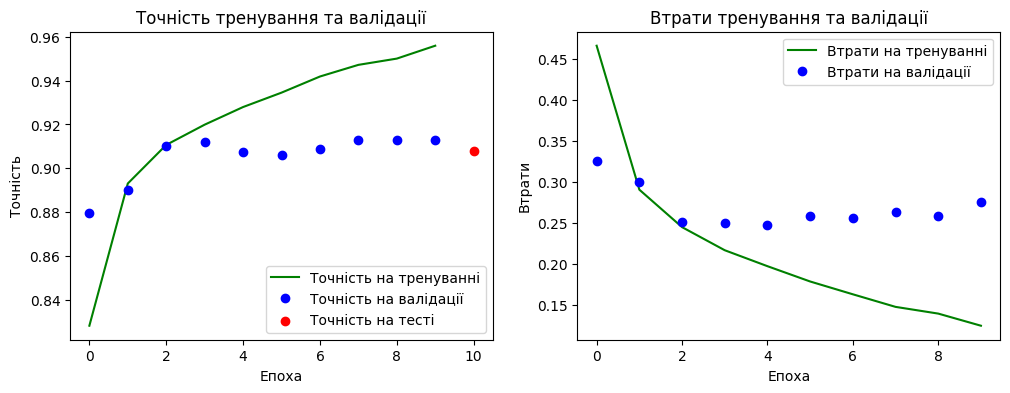

In [28]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_2.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_2.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_2.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

       loss  accuracy  val_loss  val_accuracy  epoch
0  0.466309  0.828208  0.325752      0.879833      0
1  0.290853  0.893062  0.300727      0.890167      1
2  0.245185  0.910667  0.250920      0.910167      2
3  0.217018  0.919896  0.249746      0.912000      3
4  0.197582  0.927938  0.248075      0.907417      4
5  0.178924  0.934500  0.258766      0.906083      5
6  0.163318  0.941854  0.256382      0.908583      6
7  0.147981  0.947167  0.264187      0.912917      7
8  0.139785  0.950021  0.258687      0.912917      8
9  0.125005  0.955896  0.275762      0.912833      9


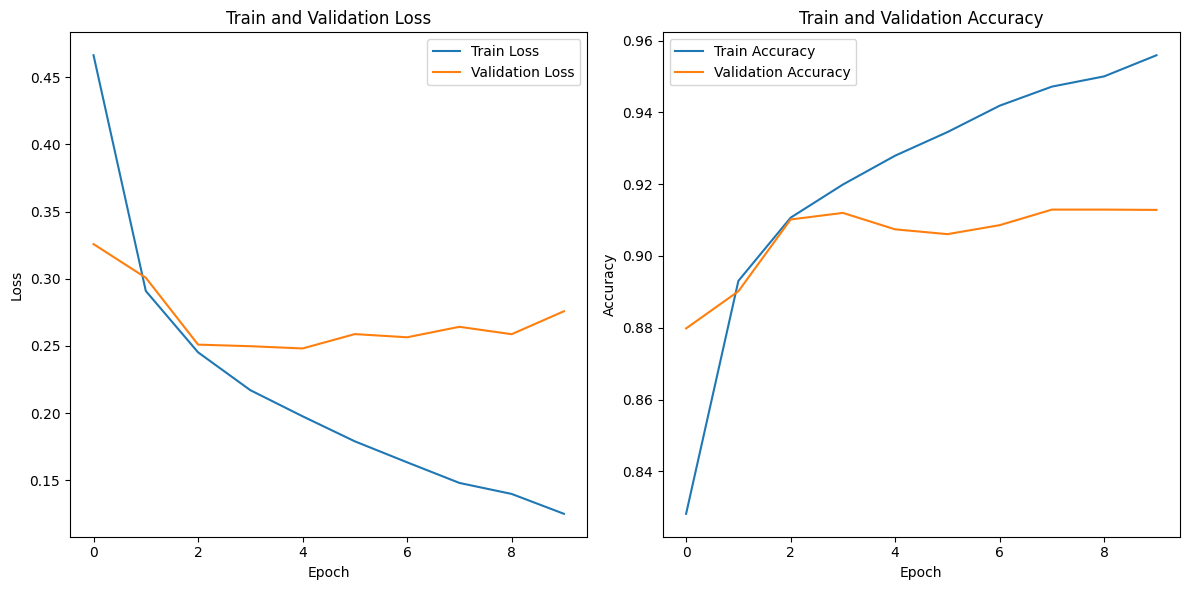

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history - це об'єкт History, отриманий після тренування моделі
# history = model.fit(...)

# Перетворюємо дані з об'єкта History в DataFrame
history_2_df = pd.DataFrame(history_2.history)

# Додаємо стовпець для епох
history_2_df['epoch'] = history_2.epoch

# Відображаємо таблицю
print(history_2_df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(history_2_df['epoch'], history_2_df['loss'], label='Train Loss')
plt.plot(history_2_df['epoch'], history_2_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(history_2_df['epoch'], history_2_df['accuracy'], label='Train Accuracy')
plt.plot(history_2_df['epoch'], history_2_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


   loss_model1  accuracy_model1  val_loss_model1  val_accuracy_model1  \
0     0.472421         0.826833         0.347803             0.869583   
1     0.298059         0.891104         0.309508             0.885250   
2     0.253107         0.907708         0.270095             0.900833   
3     0.220950         0.918688         0.265347             0.903917   
4     0.194421         0.927479         0.255243             0.909000   
5     0.171401         0.935812         0.251675             0.913500   
6     0.150039         0.943875         0.247071             0.913417   
7     0.130006         0.950917         0.266201             0.915333   
8     0.115930         0.956083         0.298628             0.908750   
9     0.100893         0.962375         0.271510             0.915583   

   loss_model2  accuracy_model2  val_loss_model2  val_accuracy_model2  
0     0.466309         0.828208         0.325752             0.879833  
1     0.290853         0.893062         0.300727    

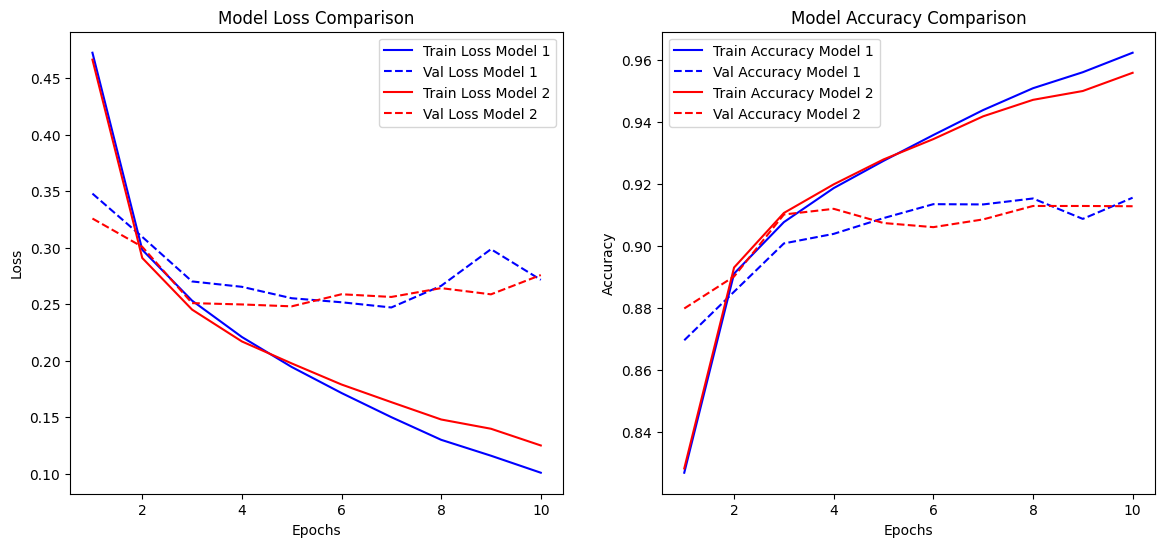

In [30]:
# Приклад використання
# Припустимо, що у вас є об'єкти History після тренування моделей:
# history_model1 = model1.fit(...)
# history_model2 = model2.fit(...)

# Перетворення історії тренування у DataFrame
comparison_df = compare_histories(history_1, history_2)

# Виведення таблиці
print(comparison_df)

# Побудова графіків для порівняння
plot_comparison(comparison_df)

In [31]:
# Отримання передбачень для тестових даних
predictions = model_con2.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.90      0.86      1000
           3       0.87      0.95      0.91      1000
           4       0.88      0.79      0.83      1000
           5       0.98      0.99      0.99      1000
           6       0.77      0.70      0.73      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
model_con2.save("fashion_mnist_model_con2.keras")

Висновок 2. Також є перенавчання. Потрібно використовувати регуляризатор.

## Модель 3. Використання Batch Normalization.

In [33]:
# Побудова та навчання моделі з Batch Normalization
model_con3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.BatchNormalization(),  # Замінюємо Dropout на BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
# Компіляція моделі
model_con3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model_con3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)               

In [36]:
history_3 = model_con3.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 [==============================] - 44s 28ms/step - loss: 0.4701 - accuracy: 0.8330 - val_loss: 0.3550 - val_accuracy: 0.8711
Epoch 2/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3240 - accuracy: 0.8820 - val_loss: 0.3144 - val_accuracy: 0.8829
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2850 - accuracy: 0.8945 - val_loss: 0.3384 - val_accuracy: 0.8790
Epoch 4/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2564 - accuracy: 0.9058 - val_loss: 0.2923 - val_accuracy: 0.8932
Epoch 5/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2361 - accuracy: 0.9126 - val_loss: 0.2865 - val_accuracy: 0.8950
Epoch 6/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2215 - accuracy: 0.9181 - val_loss: 0.4148 - val_accuracy: 0.8513
Epoch 7/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2076 - accuracy: 0.9229 - val_loss: 0.2835 -

In [37]:
test_loss, test_acc = model_con3.evaluate(test_images, test_labels, verbose=2)



313/313 - 2s - loss: 0.2858 - accuracy: 0.9025 - 2s/epoch - 7ms/step


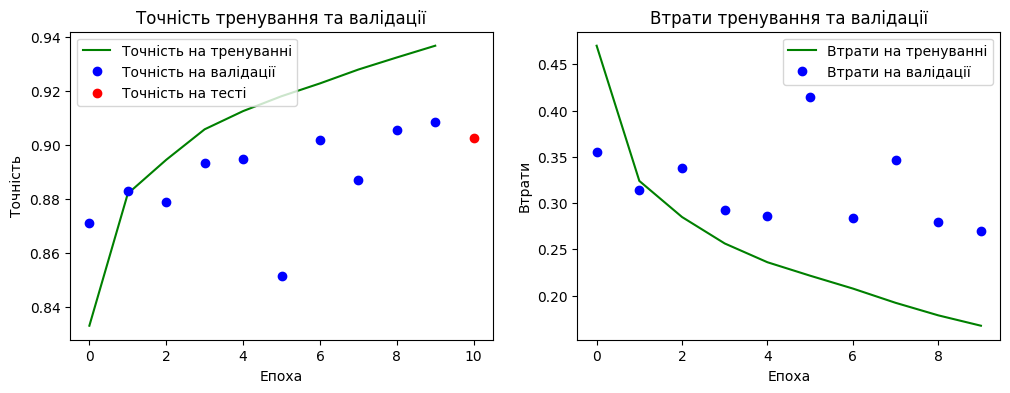

In [38]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_3.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_3.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_3.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

       loss  accuracy  val_loss  val_accuracy  epoch
0  0.470108  0.832979  0.354987      0.871083      0
1  0.323959  0.881979  0.314386      0.882917      1
2  0.284955  0.894521  0.338367      0.879000      2
3  0.256364  0.905833  0.292251      0.893167      3
4  0.236079  0.912583  0.286498      0.895000      4
5  0.221531  0.918104  0.414800      0.851333      5
6  0.207646  0.922854  0.283473      0.901750      6
7  0.192236  0.928000  0.346760      0.887000      7
8  0.178686  0.932479  0.279983      0.905417      8
9  0.167465  0.936833  0.270304      0.908417      9


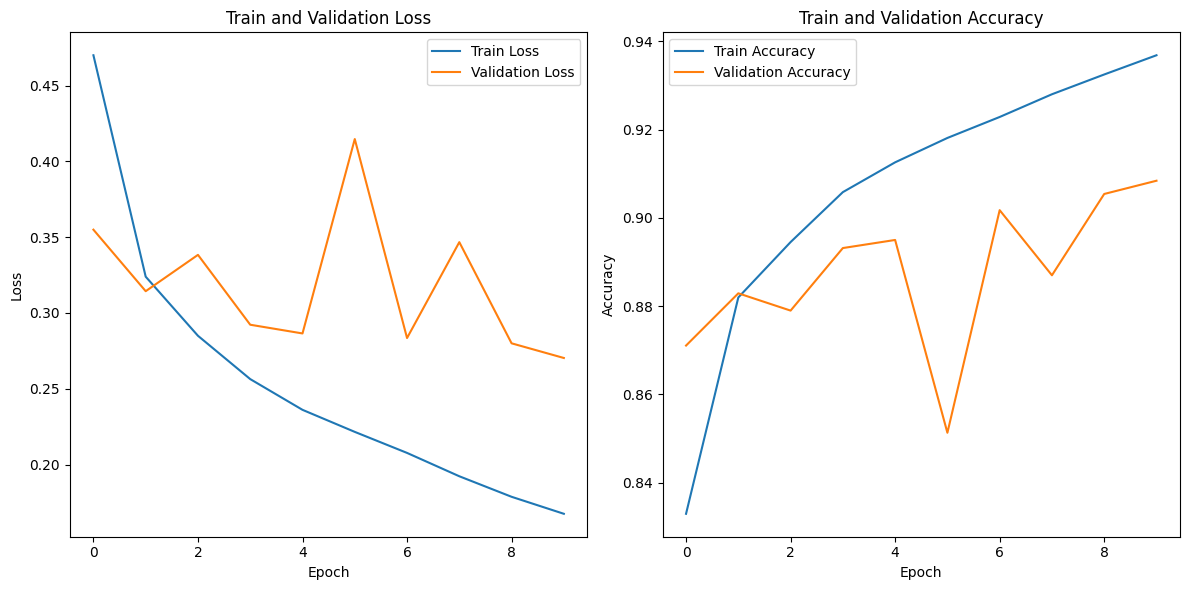

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history - це об'єкт History, отриманий після тренування моделі
# history = model.fit(...)

# Перетворюємо дані з об'єкта History в DataFrame
h = history_3
history_3_df = pd.DataFrame(h.history)
h_df = history_3_df

# Додаємо стовпець для епох
h_df['epoch'] = h.epoch

# Відображаємо таблицю
print(h_df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(h_df['epoch'], h_df['loss'], label='Train Loss')
plt.plot(h_df['epoch'], h_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(h_df['epoch'], h_df['accuracy'], label='Train Accuracy')
plt.plot(h_df['epoch'], h_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
# Отримання передбачень для тестових даних
predictions = model_con3.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.85      0.86      0.86      1000
           5       0.99      0.96      0.97      1000
           6       0.78      0.65      0.71      1000
           7       0.91      0.99      0.95      1000
           8       0.95      0.99      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [41]:
model_con3.save ("fashion_mnist_model_con3.keras")

**Висновок 3.** Мoдель із регуляризатором ранньої зупинки дала трохи нижчий результат точності тренувальних даних, але точність і інші метрики якості тестових даних були 0.88 як і в попередніх моделях, бачимо, що перенавчання було менше. Але валідаційна точність зростає до 0.902 на 4-й епосі, але потім вона починає коливатися, що може вказувати на перенавчання.

## Модель 4. Мoдель із регуляризатором Dropout.

In [42]:
# Побудова та навчання моделі з Dropout

model_con4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),  # Замінюємо Flatten на GlobalMaxPooling2D
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout як регуляризатор
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [43]:

# Компіляція моделі
model_con4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model_con4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_1 (Gl  (None, 64)               

In [45]:
history_4 = model_con4.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.6978 - accuracy: 0.7415 - val_loss: 0.4584 - val_accuracy: 0.8332
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.4557 - accuracy: 0.8346 - val_loss: 0.3721 - val_accuracy: 0.8627
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3942 - accuracy: 0.8571 - val_loss: 0.3344 - val_accuracy: 0.8750
Epoch 4/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3525 - accuracy: 0.8711 - val_loss: 0.3154 - val_accuracy: 0.8833
Epoch 5/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3263 - accuracy: 0.8810 - val_loss: 0.3014 - val_accuracy: 0.8901
Epoch 6/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3059 - accuracy: 0.8880 - val_loss: 0.3017 - val_accuracy: 0.8907
Epoch 7/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2912 - accuracy: 0.8927 - val_loss: 0.2924 -

In [46]:
test_loss, test_acc = model_con4.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - loss: 0.2997 - accuracy: 0.8967 - 3s/epoch - 8ms/step


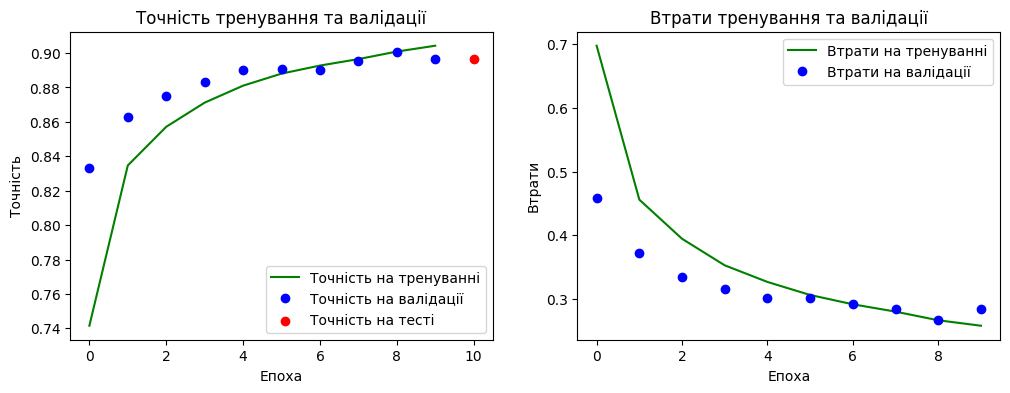

In [47]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_4.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_4.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_4.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

       loss  accuracy  val_loss  val_accuracy  epoch
0  0.697779  0.741542  0.458443      0.833167      0
1  0.455734  0.834646  0.372065      0.862750      1
2  0.394235  0.857104  0.334390      0.875000      2
3  0.352476  0.871146  0.315407      0.883333      3
4  0.326348  0.881000  0.301415      0.890083      4
5  0.305860  0.888000  0.301677      0.890667      5
6  0.291215  0.892687  0.292430      0.889833      6
7  0.279670  0.896438  0.283500      0.895333      7
8  0.266090  0.900813  0.267257      0.900750      8
9  0.257524  0.904208  0.283821      0.896500      9


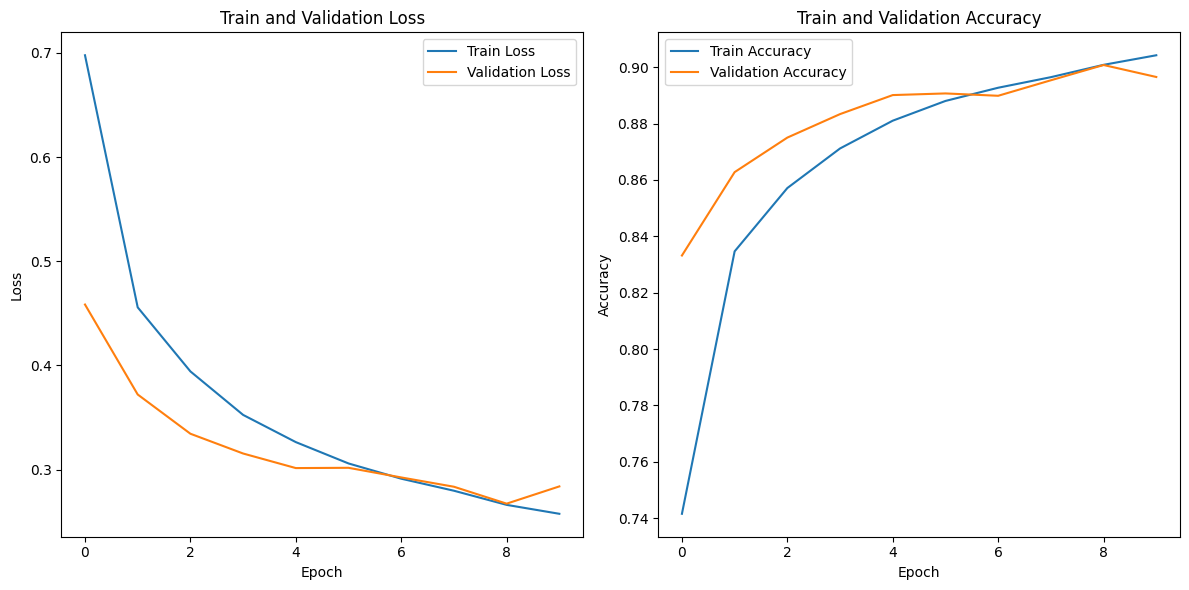

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history - це об'єкт History, отриманий після тренування моделі
# history = model.fit(...)

# Перетворюємо дані з об'єкта History в DataFrame
h = history_4
history_4_df = pd.DataFrame(h.history)
h_df = history_4_df

# Додаємо стовпець для епох
h_df['epoch'] = h.epoch

# Відображаємо таблицю
print(h_df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(h_df['epoch'], h_df['loss'], label='Train Loss')
plt.plot(h_df['epoch'], h_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(h_df['epoch'], h_df['accuracy'], label='Train Accuracy')
plt.plot(h_df['epoch'], h_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
# Отримання передбачень для тестових даних
predictions = model_con4.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.91      0.90      0.90      1000
           4       0.87      0.79      0.83      1000
           5       0.96      0.99      0.97      1000
           6       0.76      0.63      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [50]:

model_con4.save ("fashion_mnist_model_con4.keras")

**Висновок 4.** Застосування регуляризатора Dropout (0,25) повністю усунуло недонавчання. Точність моделі не особливо висока, приблизно 0.90, причому це стосується як навчальних, так і тестових даних. Надалі поєднуємо регуляризатори і збільшуємо кількість епох.

## Модель 5. Модель з Dropout та BatchNormalization, кількість епох 15.

In [51]:
# Побудова та навчання моделі з Dropout та BatchNormalization для зменшення перенавчання (Dropout) та поліпшення загальної стабільності та ефективності моделі (BatchNormalization).

model_con5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout
    tf.keras.layers.BatchNormalization(),  # Додаємо BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [52]:
# Компіляція моделі
model_con5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model_con5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_2 (Gl  (None, 64)               

In [54]:
history_5 = model_con5.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))



Epoch 1/15
1500/1500 [==============================] - 42s 27ms/step - loss: 0.6258 - accuracy: 0.7725 - val_loss: 0.3985 - val_accuracy: 0.8565
Epoch 2/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.4305 - accuracy: 0.8450 - val_loss: 0.3383 - val_accuracy: 0.8765
Epoch 3/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3780 - accuracy: 0.8624 - val_loss: 0.3470 - val_accuracy: 0.8727
Epoch 4/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3502 - accuracy: 0.8731 - val_loss: 0.2915 - val_accuracy: 0.8934
Epoch 5/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3237 - accuracy: 0.8824 - val_loss: 0.3012 - val_accuracy: 0.8930
Epoch 6/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3099 - accuracy: 0.8865 - val_loss: 0.3069 - val_accuracy: 0.8852
Epoch 7/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.2695 -

In [55]:
test_loss, test_acc = model_con5.evaluate(test_images, test_labels, verbose=2)


313/313 - 4s - loss: 0.2675 - accuracy: 0.9039 - 4s/epoch - 12ms/step


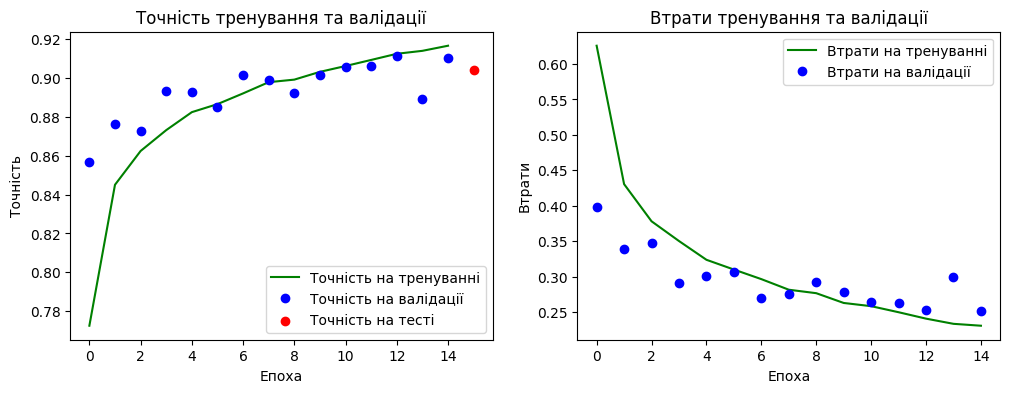

In [56]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_5.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_5.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_5.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_5.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_5.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

        loss  accuracy  val_loss  val_accuracy  epoch
0   0.625795  0.772542  0.398458      0.856500      0
1   0.430460  0.845042  0.338332      0.876500      1
2   0.378022  0.862417  0.346955      0.872750      2
3   0.350152  0.873146  0.291540      0.893417      3
4   0.323679  0.882396  0.301224      0.893000      4
5   0.309909  0.886521  0.306912      0.885250      5
6   0.296385  0.892042  0.269470      0.901333      6
7   0.281434  0.897812  0.275814      0.898750      7
8   0.276538  0.899125  0.292633      0.892500      8
9   0.262747  0.903125  0.278640      0.901583      9
10  0.258217  0.906125  0.263409      0.905750     10
11  0.249665  0.909250  0.262788      0.906167     11
12  0.240625  0.912417  0.253089      0.911167     12
13  0.233299  0.913938  0.299950      0.888917     13
14  0.230623  0.916562  0.250847      0.910167     14


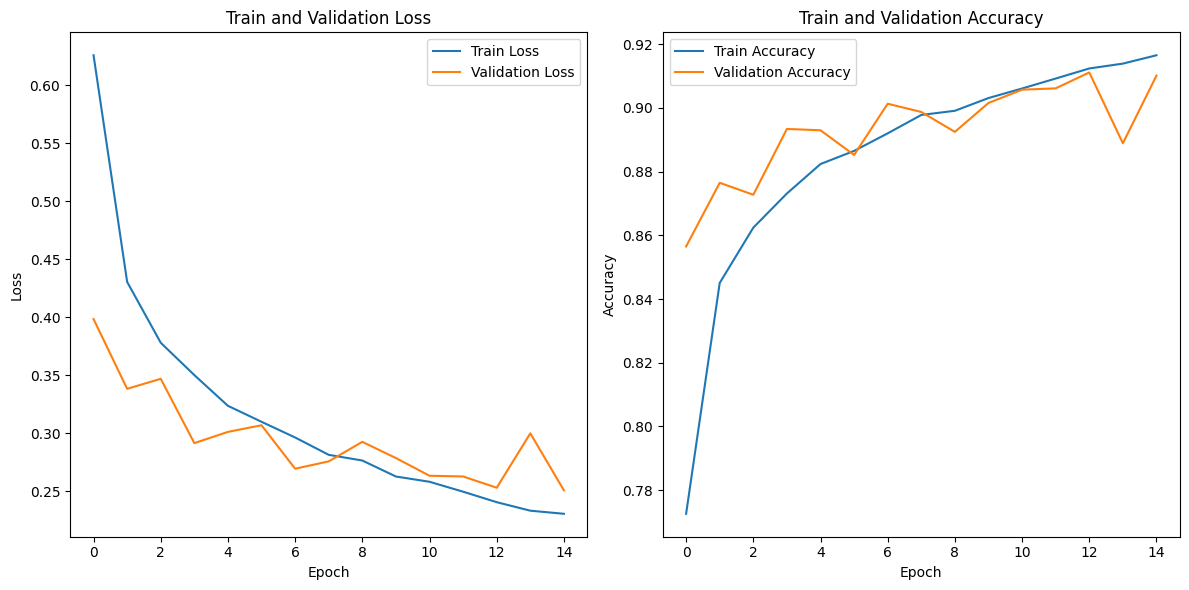

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history - це об'єкт History, отриманий після тренування моделі
# history = model.fit(...)

# Перетворюємо дані з об'єкта History в DataFrame
h = history_5
history_5_df = pd.DataFrame(h.history)
h_df = history_5_df

# Додаємо стовпець для епох
h_df['epoch'] = h.epoch

# Відображаємо таблицю
print(h_df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(h_df['epoch'], h_df['loss'], label='Train Loss')
plt.plot(h_df['epoch'], h_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(h_df['epoch'], h_df['accuracy'], label='Train Accuracy')
plt.plot(h_df['epoch'], h_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [58]:
# Отримання передбачень для тестових даних
predictions = model_con5.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.90      0.86      1000
           3       0.91      0.89      0.90      1000
           4       0.85      0.86      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.72      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [59]:

model_con5.save ("fashion_mnist_model_con5.keras")

**Висновок 5.** Тепер отримали відповідність тестових даних до навчальних. Точність все ще недостатня. Спробуємо використати Dropout, збільшити швидкість навчання і додати розмір вибірки за рахунок генератора.

## Модель 6. Dropout, збільшити швидкість навчання і додати розмір вибірки за рахунок генератора.

Як loss використовуємо 'sparse_categorical_crossentropy'

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [61]:
# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()



In [62]:
# Розширення розмірності зображень для відповідності формату, очікуваному Conv2D шарами
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [63]:
# Нормалізація піксельних значень до діапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [64]:
# Створення об'єкта генератора даних з параметрами аугментації для навчальних даних
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [65]:
# Генератор даних для навчального набору
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)



In [66]:
# Генератор даних для валідаційного набору без аугментації
validation_datagen = ImageDataGenerator()

In [67]:
# Генератор даних для валідаційного набору
validation_generator = validation_datagen.flow(test_images, test_labels, batch_size=64)



In [68]:
# Визначення моделі
model_con6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Глибина вхідного шару 1
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [69]:
# Компіляція моделі
model_con6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


In [70]:
# Тренування моделі з використанням генератора даних
history_6= model_con6.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
938/938 [==============================] - 66s 69ms/step - loss: 0.9572 - accuracy: 0.6411 - val_loss: 0.6213 - val_accuracy: 0.7587
Epoch 2/30
938/938 [==============================] - 64s 68ms/step - loss: 0.6985 - accuracy: 0.7357 - val_loss: 0.5744 - val_accuracy: 0.7744
Epoch 3/30
938/938 [==============================] - 64s 68ms/step - loss: 0.6220 - accuracy: 0.7646 - val_loss: 0.5152 - val_accuracy: 0.8102
Epoch 4/30
938/938 [==============================] - 64s 68ms/step - loss: 0.5803 - accuracy: 0.7828 - val_loss: 0.4687 - val_accuracy: 0.8285
Epoch 5/30
938/938 [==============================] - 64s 68ms/step - loss: 0.5457 - accuracy: 0.7963 - val_loss: 0.4225 - val_accuracy: 0.8450
Epoch 6/30
938/938 [==============================] - 62s 66ms/step - loss: 0.5196 - accuracy: 0.8043 - val_loss: 0.4112 - val_accuracy: 0.8514
Epoch 7/30
938/938 [==============================] - 64s 68ms/step - loss: 0.5020 - accuracy: 0.8133 - val_loss: 0.3847 - val_accuracy:

In [71]:

model_con6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_3 (Gl  (None, 64)               

In [72]:
test_loss, test_acc = model_con6.evaluate(test_images, test_labels, verbose=2)



313/313 - 2s - loss: 0.3386 - accuracy: 0.8745 - 2s/epoch - 7ms/step


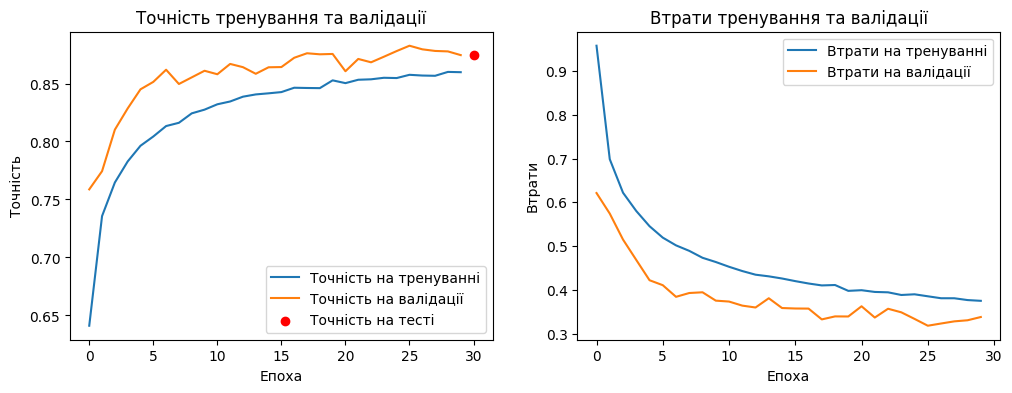

In [73]:
plot_history(history_6)

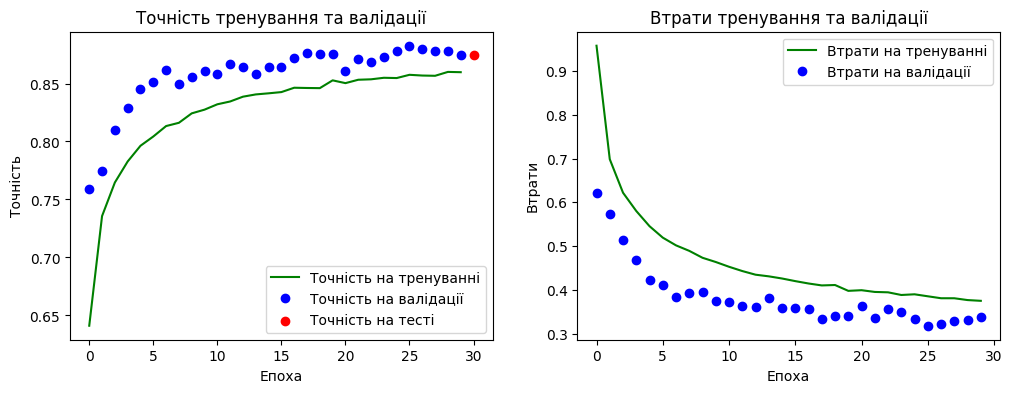

In [74]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_6.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_6.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_6.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_6.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_6.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

        loss  accuracy  val_loss  val_accuracy  epoch
0   0.957215  0.641117  0.621334        0.7587      0
1   0.698451  0.735667  0.574434        0.7744      1
2   0.622019  0.764633  0.515195        0.8102      2
3   0.580329  0.782767  0.468726        0.8285      3
4   0.545702  0.796317  0.422503        0.8450      4
5   0.519619  0.804300  0.411183        0.8514      5
6   0.501965  0.813317  0.384671        0.8619      6
7   0.489444  0.816133  0.393344        0.8496      7
8   0.473660  0.824267  0.394988        0.8553      8
9   0.464034  0.827467  0.375948        0.8610      9
10  0.453167  0.832083  0.373864        0.8580     10
11  0.443433  0.834517  0.364586        0.8669     11
12  0.435110  0.838650  0.360316        0.8641     12
13  0.431359  0.840600  0.381399        0.8584     13
14  0.426430  0.841550  0.359084        0.8640     14
15  0.420444  0.842617  0.358027        0.8642     15
16  0.415034  0.846367  0.357800        0.8722     16
17  0.410640  0.846150  0.33

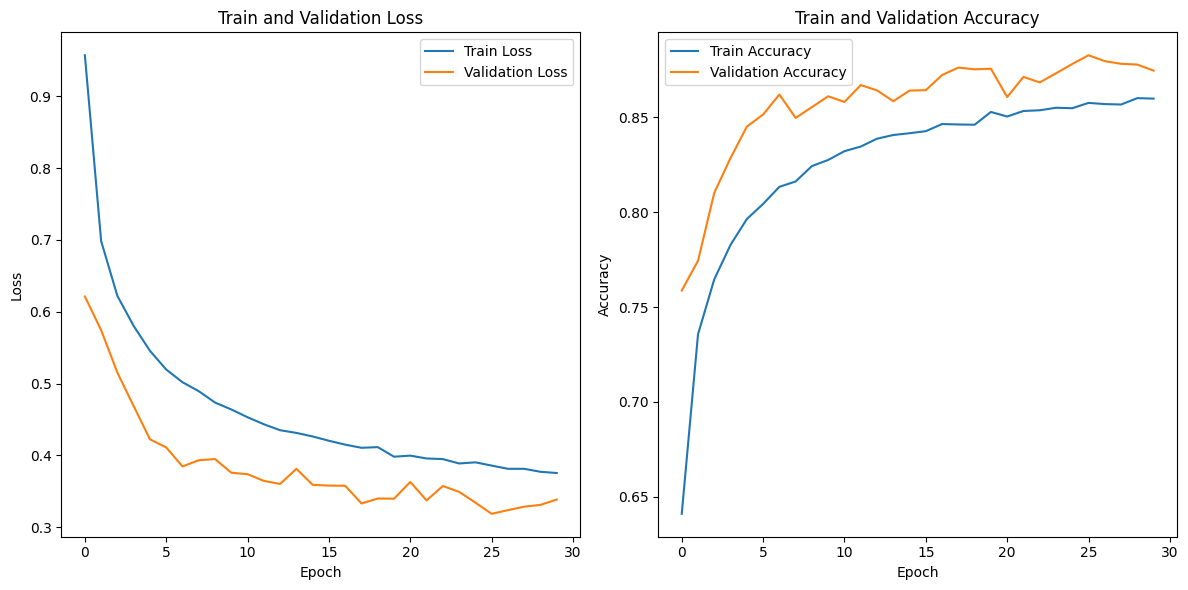

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що history - це об'єкт History, отриманий після тренування моделі
# history = model.fit(...)

# Перетворюємо дані з об'єкта History в DataFrame
h = history_6
history_6_df = pd.DataFrame(h.history)
h_df = history_6_df

# Додаємо стовпець для епох
h_df['epoch'] = h.epoch

# Відображаємо таблицю
print(h_df)

# Візуалізація метрик
plt.figure(figsize=(12, 6))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(h_df['epoch'], h_df['loss'], label='Train Loss')
plt.plot(h_df['epoch'], h_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(h_df['epoch'], h_df['accuracy'], label='Train Accuracy')
plt.plot(h_df['epoch'], h_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [76]:

import numpy as np
from sklearn.metrics import classification_report

# Отримання передбачень для тестових даних
predictions = model_con6.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Генерація classification report
report = classification_report(test_labels, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.91      0.79      0.85      1000
           4       0.85      0.74      0.79      1000
           5       0.96      0.98      0.97      1000
           6       0.62      0.69      0.65      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



In [77]:
model_con6.save ("fashion_mnist_model_con6.keras")

**Висновок 6.** Створення генератора для розширення тренувальної та тестової бази даних ускладнило навчання моделі. Точність навчальних даних весь час відставала від точності валідаційних. Кількість епох використав 30. Точність моделі досягала лише 0.88. Це суттєво нижче, ніж у попередніх моделей.

ВИСНОВОК HW13_task1: найвищі показники точності і інших метрик було досягнуто в моделі із використанням регуляризатора Dropout, Dropout і BatchNormalization. В моделях без регуляризації були вищі точність навчальних даних і нижчі тестових, що свідчить про перенавачання. В завданні із генератором маємо тривале навчання із елементами недонавчання і низькими показниками метрик якості.